In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os as os
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import EfficientNetB3
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.optimizers import Adam

In [9]:
train_orig = pd.read_csv('dataset/train.csv')
test_orig = pd.read_csv('dataset/test.csv')

In [10]:
train = train_orig.drop(['label'], axis = 1)
label = train_orig.label
target = pd.get_dummies(label, columns=['label'], drop_first=False)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size = 0.2, random_state = 1004)

In [16]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(48000,784,)
x_test = x_test.reshape(12000,784,)

x_train = x_train/255.0
x_test = x_test/255.0

In [69]:
batch_size = 128

model = Sequential()

model.add(Dense(784, activation='relu', input_shape =(784,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))        
model.add(Dense(250, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_28 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_29 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_30 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_31 (Dense)             (None, 30)                7530      
_________________________________________________________________
dense_32 (Dense)             (None, 250)               7750      
_________________________________________________________________
dense_33 (Dense)             (None, 500)              

In [70]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'mse', metrics=['mse'])
hist10 = model.fit(x_train, x_train, epochs=10, batch_size = batch_size, verbose = 1)

Epoch 1/10
375/375 [==============================] - 15s 41ms/step - loss: 0.0693 - mse: 0.0693
Epoch 2/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0300 - mse: 0.0300
Epoch 3/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0219 - mse: 0.0219
Epoch 4/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0184 - mse: 0.0184
Epoch 5/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0162 - mse: 0.0162
Epoch 6/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0146 - mse: 0.0146
Epoch 7/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0134 - mse: 0.0134
Epoch 8/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0124 - mse: 0.0124
Epoch 9/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0116 - mse: 0.0116
Epoch 10/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0111 - mse: 0.0111


In [78]:
def plot_loss(history, title):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

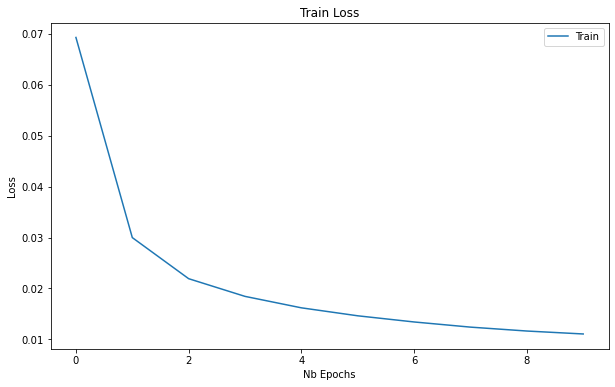

In [79]:
plot_loss(hist10, 'Train Loss')

In [71]:
# save model architecture
model_json = model.to_json()
open('AE.json', 'w').write(model_json)

# save model's learned weights
model.save_weights('AE_weights.h5', overwrite=True)

In [72]:
from keras.models import model_from_json 

json_file = open("AE.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 
# model weight load 
loaded_model.load_weights("AE_weights.h5")
print("Loaded model from disk")

Loaded model from disk


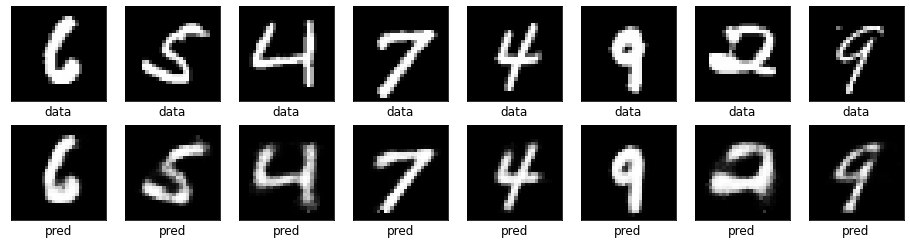

In [73]:
fig = plt.figure(figsize = (16,8))

for i in range(8):
    x = x_train[i].reshape(1,784)
    y = loaded_model.predict(x)
    xx = x.reshape(28,28)
    yy = y.reshape(28,28)

    ax = fig.add_subplot(2, 8, i+1)
    plt.imshow(xx, cmap='gray')
    plt.xlabel("data", fontsize = 12)
    plt.xticks([]) 
    plt.yticks([])
    
    ax = fig.add_subplot(1, 8, i+1)
    plt.imshow(yy, cmap='gray')
    plt.xlabel("pred", fontsize = 12)
    plt.xticks([]) 
    plt.yticks([])
plt.show()